# Aula 3 - Dados como apoio a tomada de decisão.ipynb

---

### Data Warehouse

- Um **depósito** de dados 
    - É um repositório (ou arquivamento) de informações `colhidas de várias origens`, armazenadas sob um esquema unificado, em um único local.

- Uma vez reunidos os dados, eles são armazenados por muito tempo, permitindo o acesso a `dados históricos`.

- Os depósitos de dados oferecem ao usuário uma única interface consolidada para os dados, facilitando a escrita de consultas de apoio a decisão.

---

### OLAP x OLTP

- **OLAP** é a sigla em inglês para On-Line Anaytical Processing (Processamento Analítico On-Line) e significa que as informações são processadas para uma análise complexa
    - Exemplo: Data Warehouse 

- **OLTP** é On-Line Transaction Processing (Processamento de Transação On-Line) refere-se aos sistemas com os quais trabalhamos normalmente, ou seja, qualquer operação (inserção, alteração, ou exclusão) é executada de imediato no banco de dados utilizando-se transações.
    - Exemplos:
        1. Sistema de cadastro de clientes;
        2. CRM;
        3. Sistema de Gestão Empresarial (ERP - `Enterprise Resource Planning`).
---

### ***DATA MINING***

- O termo ``mineração de dados`` ou ``data mining`` refere-se, em geral, ao processo de analisar grandes bancos de dados para encontrar padrões úteis.

- Assim como a descoberta de conhecimento na inteligência artificial (também chamada ``aprendizado de máquina``) ou na análise estatística, a mineração de dados tenta descobrir regras e padrões a partir dos dados.

- Busca a descoberta do conhecimento nos bancos de dados.
---

> Segundo Silberschatz, Korth e Sudarshan (2020), um depósito de dados (Data Warehouse) é um repositório (ou arquivamento) de informações colhidas de várias origens, armazenadas sob um esquema unificado, em um único local.

- Uma vez reunidos, os dados são armazenados por muito tempo, permitindo o acesso a dados históricos.

- Assim, os depósitos de dados oferecem ao usuário uma única interface consolidada para os dados, facilitando a escrita de consultas de apoio à decisão.

- Além disso, acessando informações a partir de um depósito de dados, quem toma decisões pode garantir que os sistemas de processamento de transação on-line não serão afetados pela carga de trabalho de apoio à decisão.

- A Figura 1 mostra a arquitetura de um depósito de dados típico e ilustra a coleta, o armazenamento e o suporte da consulta e análise de dados. Entre as questões a serem enfrentadas na montagem de um depósito de dados, estão as seguintes:

- **Quando e como coletar dados**: em uma arquitetura controlada pela fonte para a coleta de dados, as fontes de dados transmitem novas informações, seja continuamente (quando ocorre o processamento da transação) ou periodicamente (à noite, por exemplo).
    - Já em uma arquitetura controlada por destino, o depósito de dados envia, periodicamente, solicitações para novos dados às fontes.
---
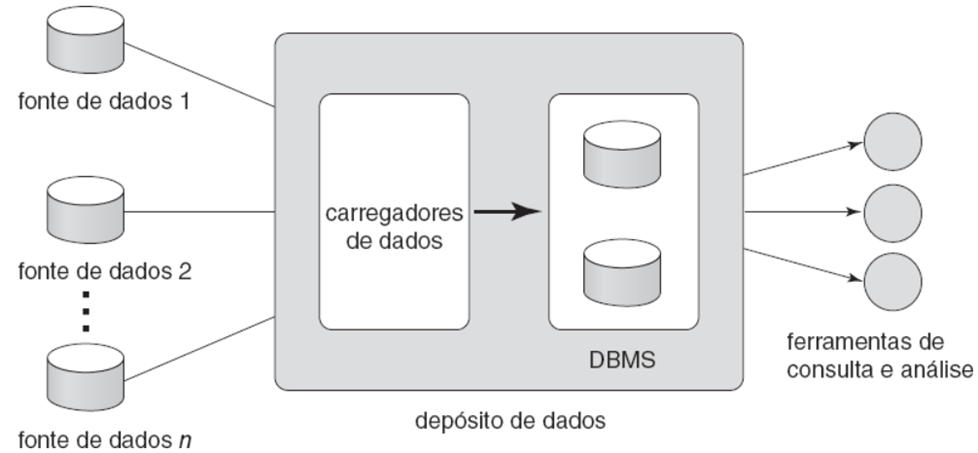

---

- Ainda conforme Silberschatz, Korth e Sudarshan (2020), a menos que as atualizações nas fontes sejam replicadas no depósito de forma síncrona, este nunca estará muito atualizado.

- A replicação síncrona pode ser **dispendiosa**, de modo que os depósitos de dados normalmente não a utilizam, realizando consultas somente sobre dados que são antigos o bastante para terem sido completamente replicados.

- Tradicionalmente, os analistas se satisfaziam com os dados do dia anterior, de tal forma que os depósitos de dados poderiam ser carregados com dados até o final do dia anterior.
    - Porém, cada vez mais organizações desejam dados mais atualizados.

> Os requisitos de atualidade dos dados variam conforme a aplicação.

- Dados de até algumas horas atrás podem ser suficientes para algumas aplicações; outras, que exigem respostas em tempo real a determinados eventos, podem usar a infraestrutura de processamento streaming no lugar de depender de uma infraestrutura de depósito de dados.

**Que esquema utilizar:** as fontes de dados que foram construídas de forma independente provavelmente terão diferentes esquemas.

- Na verdade, elas podem até mesmo usar diferentes modelos de dados.

- Parte da tarefa de um depósito é realizar a integração de esquema e converter dados para o esquema integrado antes que eles sejam armazenados.

- Como resultado, tem-se que os dados armazenados no depósito não são apenas uma cópia dos dados das fontes.

- Em vez disso, eles podem ser imaginados como uma visão materializada dos dados nas fontes.

**Transformação e limpeza de dados:** a tarefa de corrigir e pré-processar dados é chamada de ``limpeza de dados``.

- As fontes de dados normalmente entregam dados com diversas inconsistências menores, que podem ser corrigidas.

- Por exemplo, os nomes normalmente possuem erros de digitação, e os endereços podem ter erros em campos de rua/bairro/cidade ou códigos postais informados incorretamente.

- Eles podem ser corrigidos até certo ponto consultando-se um banco de dados de nomes de rua e códigos postais em cada cidade.

- A combinação aproximada de dados exigidos para essa tarefa é considerada como pesquisa difusa (``fuzzy lookup``).

> As listas de endereços coletadas de várias fontes podem ter duplicatas que precisam ser eliminadas em uma operação merge-purge (operação também conhecida como eliminação de duplicidade). Os registros para os vários indivíduos em uma casa podem ser agrupados de modo que apenas uma correspondência seja enviada para a residência; essa operação é chamada de householding.

---

- Os dados podem ser transformados de outras maneiras além da limpeza, como:
    - A mudança de unidades de medida ou a conversão para um esquema diferente, pela junção de dados de várias relações de origem.
    - Vale dizer que os depósitos de dados normalmente possuem ferramentas gráficas para dar suporte à transformação. Essas ferramentas permitem que a transformação seja especificada como caixas, e que linhas possam ser criadas entre elas para indicar o fluxo dos dados. As caixas condicionais podem, assim, direcionar os dados para um próximo passo apropriado na transformação. 

- **Como propagar atualizações:** as atualizações sobre as relações nas fontes de dados precisam ser propagadas para o depósito de dados.

    - Se as relações no depósito de dados forem exatamente as mesmas daquelas na fonte de dados, a propagação será direta. 
    - Se não forem, o problema de propagação de atualizações é, basicamente, o problema de manutenção de visão (view-maintenance).

- **Quais dados resumir:** os dados brutos gerados por um sistema de processamento de transação podem ser muito grandes para serem armazenados on-line.

    - Porém, podemos responder a muitas consultas mantendo apenas dados de resumo obtidos pela agregação sobre uma relação, em vez de manter a relação inteira.
    - Por exemplo, em lugar de armazenar dados sobre cada venda de roupas possível, podemos armazenar o total de vendas de roupas por nome e categoria do item.

---

#### ETL e ELT

> As diferentes etapas envolvidas na obtenção de dados para um depósito de dados são chamadas de tarefas de *extração*, *transformação* e *carga* (``ETL``);

- A _extração_ refere-se à obtenção de dados das fontes;
- Enquanto a _carga_ diz respeito à carga dos dados no depósito de dados.

- Nos depósitos de dados de última geração, que possuem suporte para funções definidas pelo usuário ou frameworks MapReduce, os dados podem ser ***extraídos***, ***carregados*** para o depósito e, **depois**, ***transformados***. A abordagem ``ELT`` permite, pois, o uso de frameworks de processamento paralelo para a transformação de dados. 

---

- Para Alves (2020), quando se fala em ***Data Warehouse***, é comum ouvirmos expressões como:
    - *OLAP*,
    - *OLTP* e
    - *Data Mining*.

- ``OLAP`` é a sigla em inglês para **On-Line Analytical Processing** (_Processamento Analítico On-Line_) e significa que as informações são processadas para uma análise complexa.

- Já o ``OLTP`` - **On-Line Transaction Processing** (_Processamento de Transação On-Line_) refere-se aos sistemas com os quais trabalhamos normalmente, ou seja, qualquer operação:
    - inserção,
    - alteração ou
    - exclusão
        - Executada de imediato no banco de dados utilizando-se transações.

---

- De acordo com Silberschatz, Korth e Sudarshan (2020), o termo **mineração de dados** (ou *Data Mining*) relaciona-se, em geral, ao processo de analisar grandes bancos de dados para encontrar **_padrões úteis_**.

- Assim como a descoberta de conhecimento na inteligência artificial (também chamada aprendizado de máquina) ou na análise estatística, a mineração de dados tenta descobrir regras e padrões a partir dos dados.

- Porém, esta difere daquelas porque lida com grande volume de dados, armazenados principalmente em disco. Ou seja, a mineração de dados ocupa-se da descoberta de conhecimento nos bancos de dados (KDD).

---